## Fourier Series and Fourier Transforms 

### Contents

#### i) Fourier Series

#### ii) Discrete Fourier Series

#### iii) Fourier Transform

#### iv) Discrete Fourier Transform

#### v) Fast Fourier Transform

In [4]:
from simp13X import*
from math import*
def simp13Xdis(h,fx):
    #h denotes the step length 
    #fx denotes the discrete y-values of the list
    n=len(fx)
    f2=0
    for i in range(n):
        if i==0 or i==n-1:
            f2=f2+fx[i]
        elif i%2==0:
            f2=f2+2*fx[i]
        else:
            f2=f2+4*fx[i]
    f2=f2*(h/3)
    return f2

In [5]:
#Function returning the Fourier Coefficients
def coeffs(f_nu,N):
    P=len(f_nu)
    nu=[i for i in range(P)]
    anbn=[]
    for n in range(N+1):
        Fc_nu=[f_nu[i]*cos(2*pi*n*nu[i]/P) for i in range(P)]
        Fs_nu=[f_nu[i]*sin(2*pi*n*nu[i]/P) for i in range(P)]
        an=(2/P)*simp13Xdis(1,Fc_nu)
        bn=(2/P)*simp13Xdis(1,Fs_nu)
        anbn.append([an,bn])
    return anbn
#Function returning the list of fourier series of different harminics
def FourSeries(P,anbn):
    nu=[i for i in range(P)]
    F_nu=[0 for i in range(P)]
    for n in range(len(anbn)):
        a=anbn[n][0]
        b=anbn[n][1]
        if n == 0:
            a=a/2
        for i in range(P):
            F_nu[i]+=a*cos(2*pi*n*nu[i]/P)+b*sin(2*pi*n*nu[i]/P)
    return F_nu

##### Square Wave

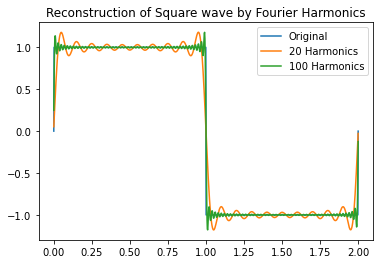

In [6]:
import matplotlib.pyplot as plt
def SqWv(pr,t):
    T,W0=pr
    if abs((t%T)-0.25*T)<0.25*T:
        ft1=W0
    else:
        ft1=0
    if abs((t%T)-0.75*T)<0.25*T:
        ft2=W0
    else:
        ft2=0
    return ft1-ft2
Nt=1000
T,W0=2,1
tmn,tmx=0,2
dt=(tmx-tmn)/(Nt-1)
t=[tmn+dt*i for i in range(Nt)]
ft=[SqWv([T,W0],t[i]) for  i in range(Nt)]
cfs=coeffs(ft,200)
plt.title('Reconstruction of Square wave by Fourier Harmonics')
plt.plot(t,ft,label="Original")
plt.plot(t,FourSeries(Nt,cfs[:20]),label="20 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:100]),label="100 Harmonics")
plt.legend()
plt.show()

##### Saw-tooth Wave

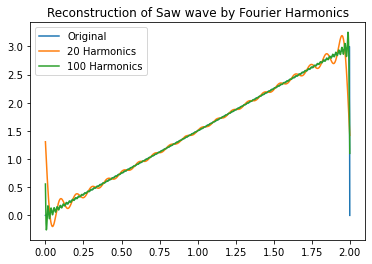

In [7]:
def sawTooth(pr,t):
    T,W0=pr
    return 0.5*W0*(t%T)
    return ft1-ft2
Nt=1000
T,W0=2,3
tmn,tmx=0,2
dt=(tmx-tmn)/(Nt-1)
t=[tmn+dt*i for i in range(Nt)]
ft=[sawTooth([T,W0],t[i]) for  i in range(Nt)]
cfs=coeffs(ft,200)
plt.title('Reconstruction of Saw wave by Fourier Harmonics')
plt.plot(t,ft,label="Original")
plt.plot(t,FourSeries(Nt,cfs[:20]),label="20 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:100]),label="100 Harmonics")
plt.legend()
plt.show()